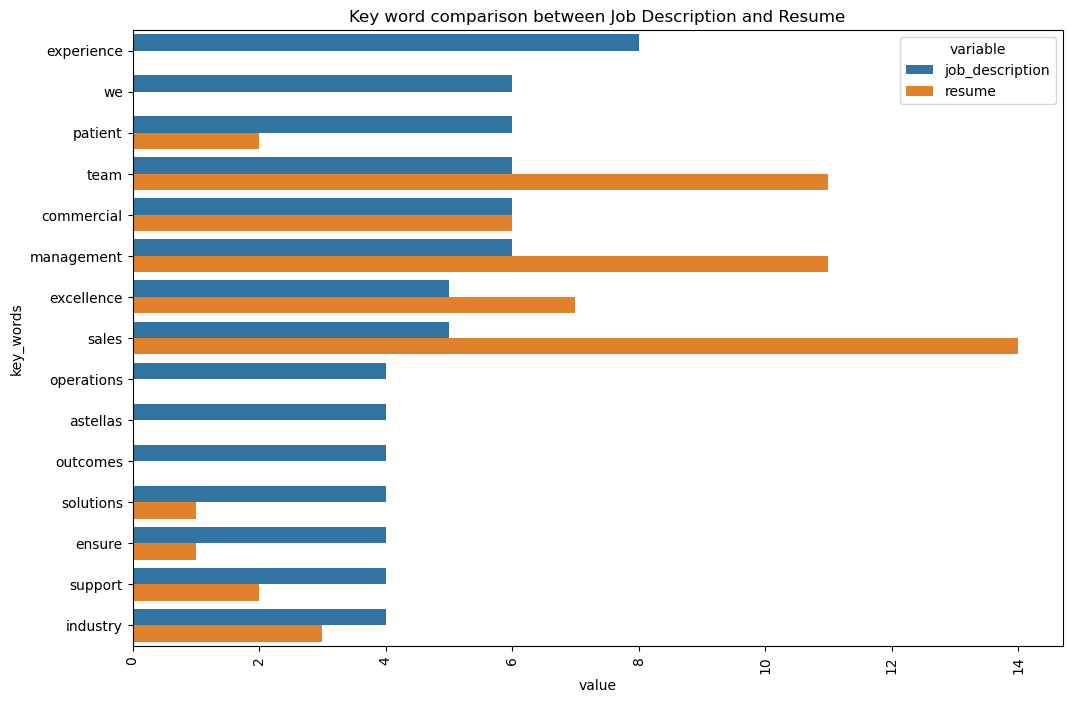

In [1]:
# !pip install docx2txt
import nltk
import docx2txt
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class KeywordMatch:
    def __init__(self, job_desc_file, resume_file, num_words=10):
        self.job_desc_file = job_desc_file
        self.resume_file = resume_file
        self.num_words = num_words

    def process_text(self, file):
        text = docx2txt.process(file)
        words = word_tokenize(text)
        stop_words = set(nltk.corpus.stopwords.words("english"))
        words = [word.lower() for word in words if word.isalpha() and word not in stop_words]
        return Counter(words)

    def compare_keywords(self):
        job_desc_keyword_counts = self.process_text(self.job_desc_file)
        job_desc_most_common_words = dict(FreqDist(job_desc_keyword_counts).most_common(self.num_words))

        resume_keyword_counts = self.process_text(self.resume_file)

        new_dict = {}
        for k, v in job_desc_most_common_words.items():
            match_found = False
            for kk, vv in resume_keyword_counts.items():
                if k == kk:
                    new_dict[k] = [v, vv]
                    match_found = True
                    break
            if not match_found:
                new_dict[k] = [v, 0]

        return new_dict

    def create_dataframe(self):
        keyword_match = self.compare_keywords()
        df = pd.DataFrame(keyword_match).T
        df.rename(columns={0:"job_description", 1:"resume"}, inplace=True)
        df.reset_index(inplace=True)
        df.rename(columns={'index':"key_words"}, inplace=True)
        return df

km = KeywordMatch("job_description/job_description.docx", "resume/resume.docx", 15)
df = km.create_dataframe()
melted_df = df.melt(id_vars=['key_words'], value_vars=['job_description', 'resume'])
plt.figure(figsize=(12,8))
ax = sns.barplot(data=melted_df, x="value", y="key_words", hue='variable',estimator=np.sum)
plt.xticks(rotation=90, ha='center')
plt.title("Key word comparison between Job Description and Resume")
plt.show()
